In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

### Load

In [2]:
pwd = os.getcwd()

In [3]:
header = ["raw"]
df = pd.read_csv(os.path.basename(pwd +'/transactions.txt'),header=None, sep='\t', names=header)


In [4]:
df_subset = df.copy()
df_subset = df_subset.replace('"','', regex=True)

In [5]:
df_subset.raw = df_subset.raw.str[1:]
df_subset.raw = df_subset.raw.str[:-1]
df_subset.head()

,raw
0,"accountNumber: 737265056, customerId: 73726505..."
1,"accountNumber: 737265056, customerId: 73726505..."
2,"accountNumber: 737265056, customerId: 73726505..."
3,"accountNumber: 737265056, customerId: 73726505..."
4,"accountNumber: 830329091, customerId: 83032909..."


In [6]:
keys = ['accountnumber', 'customerid', 'creditlimit', 'availablemoney', 
        'transactiondatetime', 'transactionamount', 'merchantname', 'acqcountry',
        'merchantcountrycode', 'posentrymode', 'posconditioncode', 'merchantcategorycode',
        'currentexpdate', 'cardpresent', 'accountopendate', 'dateoflastaddresschange',
        'cardcvv', 'enteredcvv', 'cardlast4digits', 'transactiontype', 'echobuffer', 
        'currentbalance', 'merchantcity', 'merchantstate', 'merchantzip', 'cardpresent', 
        'posonpremises', 'recurringauthind', 'expirationdatekeyinmatch', 'isfraud']

In [7]:
def parse_raw(raw_data):
    lines = raw_data.split(',')
    table = {}
    message = ''
    keys_to_extract = keys    
    for line in lines:
        
        pairs = line.split(':')  
        key = pairs[0].lower().replace(" ","")
        val = pairs[1].strip()
        
        if key in keys_to_extract:
            if val == '':
                table[key] = np.nan
            else:
                table[key] = val
    return table

In [8]:
def parse_into_table(data):
    table = [parse_raw(line) for line in data]
    return {
        key : map_to_list(table,key) for key in keys 
    }

In [9]:
def map_to_list(table, key):
    results = []
    for struc in table:
        
        if key not in struc:
            results.append('')
        else:
            results.append(struc[key])
    return results

In [10]:
df1 = pd.DataFrame(parse_into_table(df_subset.raw))

In [11]:
df1.head()

,accountnumber,customerid,creditlimit,availablemoney,transactiondatetime,transactionamount,merchantname,acqcountry,merchantcountrycode,posentrymode,...,transactiontype,echobuffer,currentbalance,merchantcity,merchantstate,merchantzip,posonpremises,recurringauthind,expirationdatekeyinmatch,isfraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14,98.55,Uber,US,US,02,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
1,737265056,737265056,5000.0,5000.0,2016-10-11T05,74.51,AMC #191138,US,US,09,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
2,737265056,737265056,5000.0,5000.0,2016-11-08T09,7.47,Play Store,US,US,09,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
3,737265056,737265056,5000.0,5000.0,2016-12-10T02,7.47,Play Store,US,US,09,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
4,830329091,830329091,5000.0,5000.0,2016-03-24T21,71.18,Tim Hortons #947751,US,US,02,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false


#### Structure of the data and Number of Null records 

In [12]:
"Dataset Dimensions: {}x{}".format(df1.shape[0], df1.shape[1])

'Dataset Dimensions: 786363x29'

In [13]:
df1.isnull().sum()

accountnumber                    0
customerid                       0
creditlimit                      0
availablemoney                   0
transactiondatetime              0
transactionamount                0
merchantname                     0
acqcountry                    4562
merchantcountrycode            724
posentrymode                  4054
posconditioncode               409
merchantcategorycode             0
currentexpdate                   0
cardpresent                      0
accountopendate                  0
dateoflastaddresschange          0
cardcvv                          0
enteredcvv                       0
cardlast4digits                  0
transactiontype                698
echobuffer                  786363
currentbalance                   0
merchantcity                786363
merchantstate               786363
merchantzip                 786363
posonpremises               786363
recurringauthind            786363
expirationdatekeyinmatch         0
isfraud             

### Columns 'merchantcity', 'merchantstate', 'merchantzip', 'posonpremises', 'recurringauthind' and 'echobuffer' are empty and removing these columns will have no effect on the final output

In [14]:
df1.drop(['merchantcity', 'merchantstate', 'merchantzip', 
          'posonpremises', 'recurringauthind', 'echobuffer'], axis=1, inplace=True)

In [73]:
df1[["creditlimit","transactionamount","availablemoney" ,"currentbalance"]] = df1[["creditlimit","transactionamount","availablemoney" ,  "currentbalance"]].apply(pd.to_numeric)


In [75]:
df1.dtypes

accountnumber                object
customerid                   object
creditlimit                 float64
availablemoney              float64
transactiondatetime          object
transactionamount           float64
merchantname                 object
acqcountry                   object
merchantcountrycode          object
posentrymode                 object
posconditioncode             object
merchantcategorycode         object
currentexpdate               object
cardpresent                  object
accountopendate              object
dateoflastaddresschange      object
cardcvv                      object
enteredcvv                   object
cardlast4digits              object
transactiontype              object
currentbalance              float64
expirationdatekeyinmatch     object
isfraud                      object
dtype: object

## Data Visualization

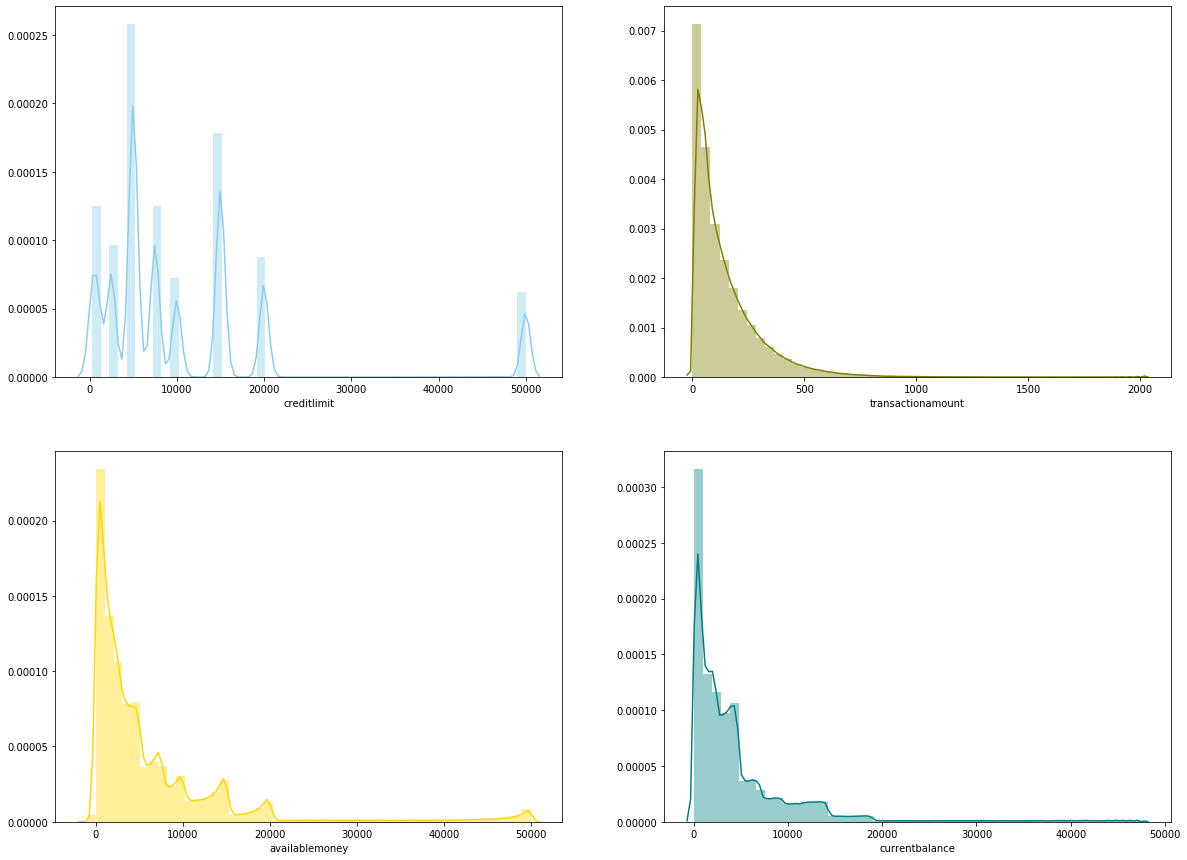

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

sns.distplot( df1["creditlimit"] , color="skyblue", ax=ax[0, 0])
sns.distplot( df1["transactionamount"] , color="olive", ax=ax[0, 1])
sns.distplot( df1["availablemoney"] , color="gold", ax=ax[1, 0])
sns.distplot( df1["currentbalance"] , color="teal", ax=ax[1, 1])

Since columns does not a similar value range we can't use single Boxplot to desplay them all 

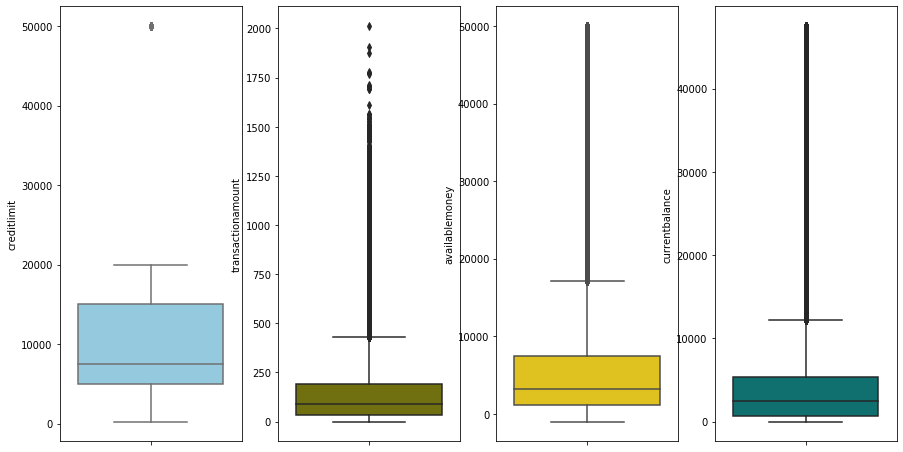

In [93]:
fig, ax = plt.subplots(1, 4, figsize=(15,8))
sns.boxplot(ax=ax[0], x=df1['creditlimit'], orient='v',color="skyblue")
sns.boxplot(ax=ax[1], x=df1['transactionamount'], orient='v',color="olive")
sns.boxplot(ax=ax[2], x=df1['availablemoney'], orient='v',color="gold")
sns.boxplot(ax=ax[3], x=df1['currentbalance'], orient='v',color="teal")

### Hypotheses about the Data structure.

### Credit Limit
- Data have few Outliers
- Since credit limit value is usually predefined by banks and it is evident from the data distribution

### Transaction Amount
- Data is highly Right skewed
- 

### Available Money
- Data is Right skewed
- 

### Current Balance
- Data is Right skewed
- 

### This a data distribution by Merchant category code with majority data under Online retail category

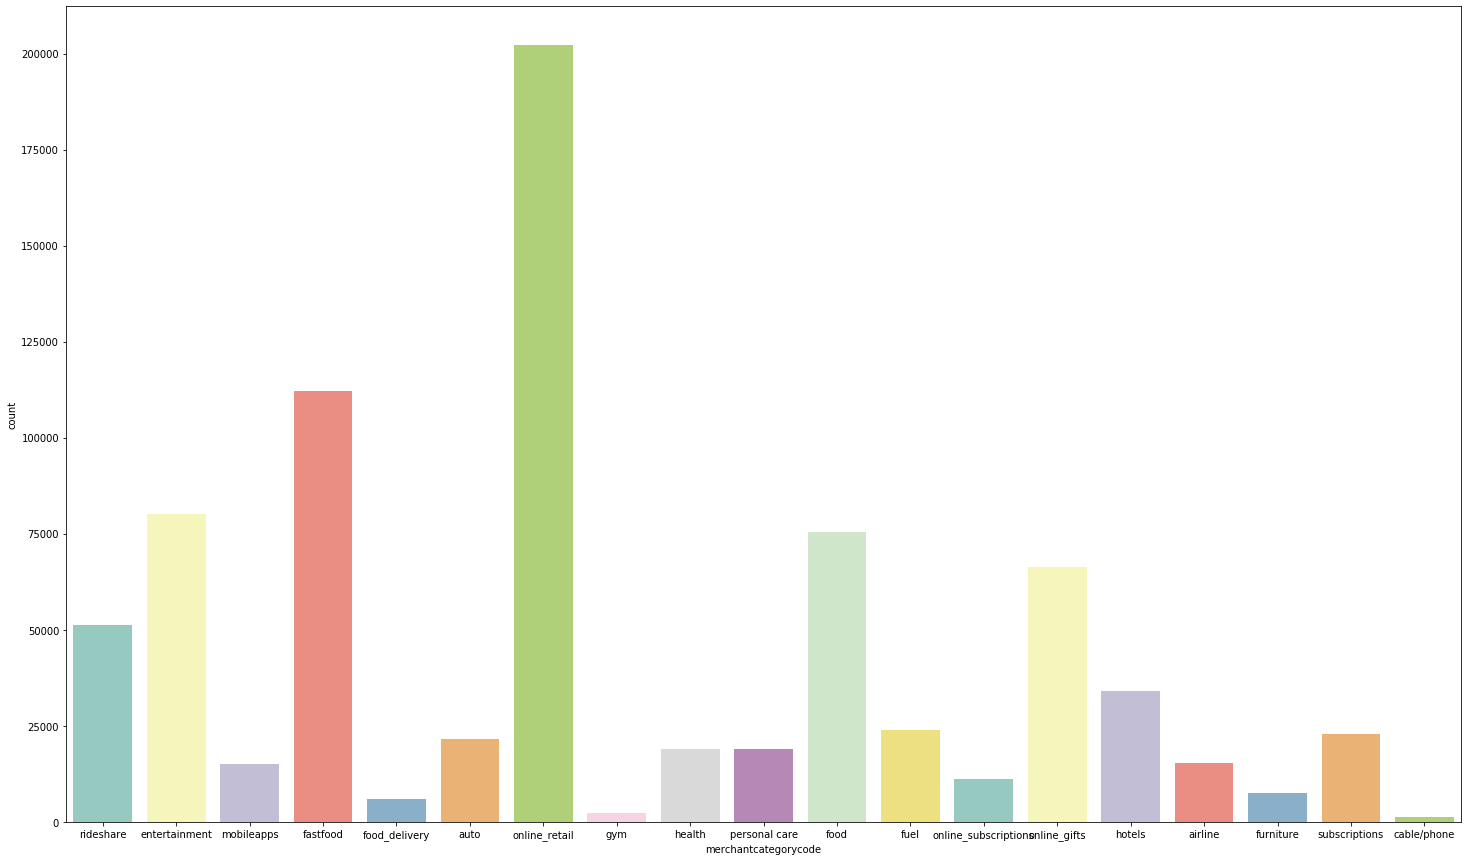

In [16]:
fig = plt.figure(figsize=(25,15)) 
ax = sns.countplot(x="merchantcategorycode", data=df1, palette="Set3")

Text(0.5, 1.0, 'Top 10 Merchants')

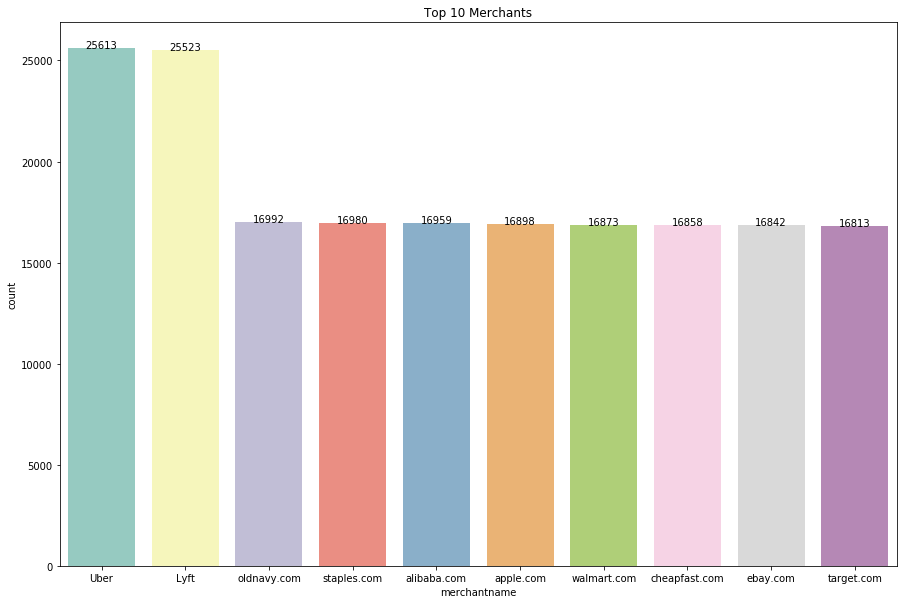

In [45]:
fig, ax1 = plt.subplots(figsize=(15,10))
graph = sns.countplot(ax=ax1,x='merchantname', data=df1,palette="Set3",
                  order=df1.merchantname.value_counts().iloc[:10].index)

graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.title('Top 10 Merchants')

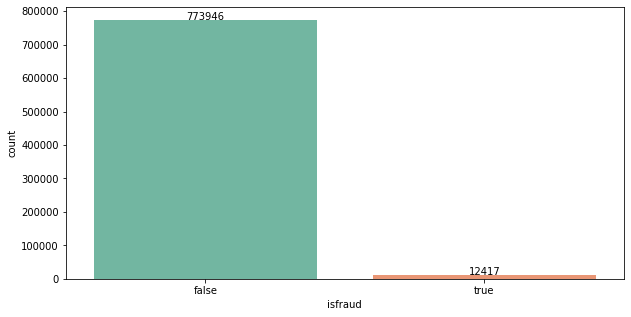

In [66]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='isfraud', data=df1,palette="Set2")
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Text(0.5, 1.0, 'POS Entry Mode')

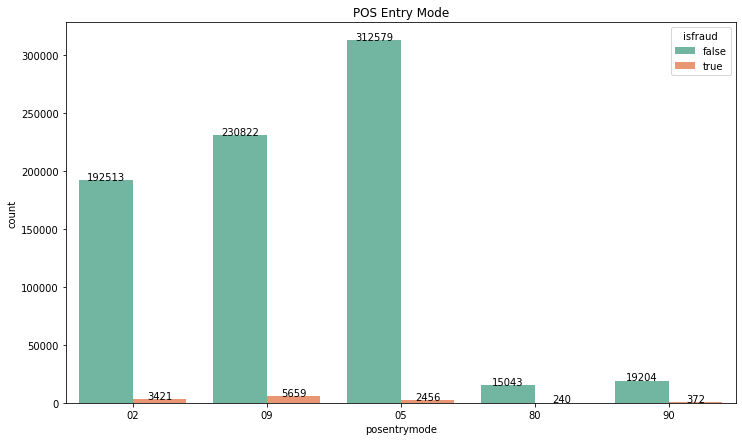

In [67]:
fig, ax1 = plt.subplots(figsize=(12,7))
graph =sns.countplot(data=df1, x='posentrymode', hue='isfraud',palette="Set2")
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.title('POS Entry Mode')